# Flight Analysis


In [61]:
#Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats


In [62]:
# Read the Data
flightdata = pd.read_csv("data/avgaf.csv")
passengerdata = pd.read_csv("data/ps.csv")

In [63]:
passengerdata.head()

,passengers,year,quarter
0,178751326,2018,1
1,205371472,2018,2
2,205919222,2018,3
3,133190426,2018,4
4,171454390,2017,1


In [64]:
passenger=passengerdata.rename(columns={'passengers':'Passengers','year':'Year','quarter':'Quarter'})
passenger.head()

,Passengers,Year,Quarter
0,178751326,2018,1
1,205371472,2018,2
2,205919222,2018,3
3,133190426,2018,4
4,171454390,2017,1


In [65]:
#Clean the passenger data
passenger.fillna(0)

,Passengers,Year,Quarter
0,178751326,2018,1
1,205371472,2018,2
2,205919222,2018,3
3,133190426,2018,4
4,171454390,2017,1
5,195041193,2017,2
6,195283602,2017,3
7,190561921,2017,4
8,167419877,2017,1
9,189271755,2016,2


In [73]:
passenger_df = pd.DataFrame(passenger)

passenger_df


,Passengers,Year,Quarter
0,178751326,2018,1
1,205371472,2018,2
2,205919222,2018,3
3,133190426,2018,4
4,171454390,2017,1
5,195041193,2017,2
6,195283602,2017,3
7,190561921,2017,4
8,167419877,2017,1
9,189271755,2016,2


In [67]:
# Filter the DataFrame down only to those columns to chart
yearly_passengers = passenger_df[["passengers","year"]]

# Set the index to be "State" so they will be used as labels
yearly_passengers = yearly_passengers.set_index("passengers")

yearly_passengers

,year
passengers,
178751326,2018
205371472,2018
205919222,2018
133190426,2018
171454390,2017
195041193,2017
195283602,2017
190561921,2017
167419877,2017


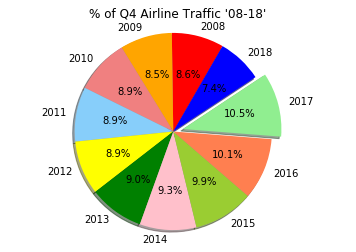

In [60]:
# Labels for the sections of our pie chart
Q4 = ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]

# The values of each section of the pie chart
traffic = [154916771, 154496705, 161405206, 161651239, 160124181, 162945857, 167994939, 178543401, 182735291, 190561921, 133190426]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "yellow", "green", "pink", "yellowgreen", "coral", "lightgreen", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0)

plt.pie(traffic, explode=explode, labels=Q4, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=60)

plt.axis("equal")

plt.title("% of Q4 Airline Traffic '08-18'")

plt.savefig("Images/Q4_pie.png")

plt.show()

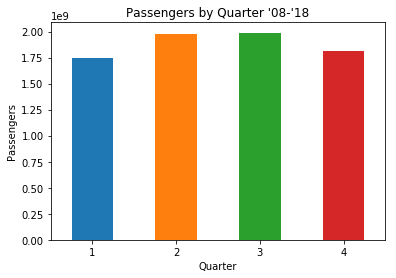

In [14]:


# Split up our data into groups based upon 'gender'
quarter_groups = passenger.groupby('Quarter')

# Find out how many of each gender took bike trips
yearly_count = quarter_groups['Passengers'].sum()





# Chart our data, give it a title, and label the axes
year_chart = yearly_count.plot(kind="bar", title="Passengers by Quarter '08-'18")
year_chart.set_xlabel("Quarter")
year_chart.set_ylabel("Passengers")





plt.xticks(rotation=360)




plt.show()

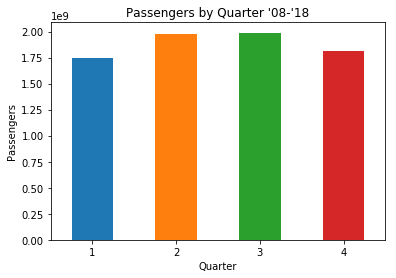

In [93]:
# Chart our data, give it a title, and label the axes
year_chart = yearly_count.plot(kind="bar", title="Passengers by Quarter '08-'18")
year_chart.set_xlabel("Quarter")
year_chart.set_ylabel("Passengers")



plt.xticks(rotation=360)

plt.savefig("Images/Total_Passengers_By_Quarter.png")


plt.show()

In [8]:
# Rename columns 
flight = flightdata.rename(columns={'year' : 'Year','airportname' : 'Airport','cityname' : 'City','statename' : 'State','avgfare' : 'AvgFare','inflationadj' : 'InflationAdj','passengersample' : 'Passenger'})


In [8]:
#new dataframe
select_columns = ["Year", "Airport", "City", "State", "AvgFare", "InflationAdj", "Passenger"]
select_columns
flight = flight[select_columns]
flight.head()

,Year,Airport,City,State,AvgFare,InflationAdj,Passenger
0,2008,Athens/Ben Epps,Athens,GA,487.26,568.29,0
1,2008,Atka Airport,Atka,AK,1284.33,1497.92,0
2,2008,Altoona-Blair County,Altoona,PA,421.49,491.58,0
3,2008,Naples Municipal,Naples,FL,381.18,444.57,0
4,2008,Laurence G Hanscom Field,Bedford,MA,169.80,198.04,0


In [87]:
#Clean the flight data
flight.fillna(0)

,Year,AvgFare,InflationAdj,Passenger
0,2008,487.26,568.29,0
1,2008,1284.33,1497.92,0
2,2008,421.49,491.58,0
3,2008,381.18,444.57,0
4,2008,169.80,198.04,0
5,2008,457.45,533.52,0
6,2008,422.57,492.84,0
7,2008,462.00,538.83,0
8,2008,279.97,326.52,0
9,2008,309.51,360.99,0


In [105]:
flight_df = pd.DataFrame(flight)

flight_df


,Year,AvgFare,InflationAdj
0,2008,487.26,568.29
1,2008,1284.33,1497.92
2,2008,421.49,491.58
3,2008,381.18,444.57
4,2008,169.80,198.04
5,2008,457.45,533.52
6,2008,422.57,492.84
7,2008,462.00,538.83
8,2008,279.97,326.52
9,2008,309.51,360.99


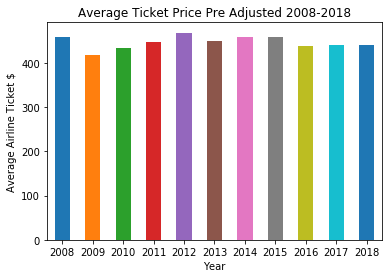

In [115]:

# Split up our data into groups based upon 'gender'
average_fare = flight_df.groupby('Year')

# Find out how many of each gender took bike trips
yearly_count = average_fare['AvgFare'].mean()





# Chart our data, give it a title, and label the axes
year_chart = yearly_count.plot(kind="bar", title="Average Ticket Price Pre Adjusted 2008-2018")
year_chart.set_xlabel("Year")
year_chart.set_ylabel("Average Airline Ticket $")





plt.xticks(rotation=360)


plt.savefig("Images/Average_price.png")

plt.show()

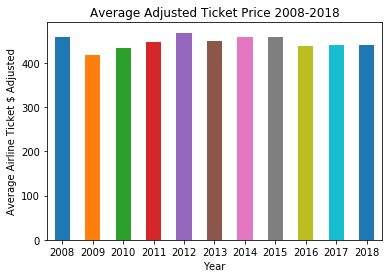

In [116]:

# Split up our data into groups based upon 'gender'
adjusted_fare = flight_df.groupby('Year')

# Find out how many of each gender took bike trips
adjusted_count = adjusted_fare['InflationAdj'].mean()





# Chart our data, give it a title, and label the axes
year_chart = yearly_count.plot(kind="bar", title="Average Adjusted Ticket Price 2008-2018")
year_chart.set_xlabel("Year")
year_chart.set_ylabel("Average Airline Ticket $ Adjusted")





plt.xticks(rotation=360)


plt.savefig("Images/adjusted_Price.png")

plt.show()

In [97]:
flight_df["AvgFare"].mean()


445.65485336048704

In [92]:
flight_df["InflationAdj"].mean()


486.2154439918522